# **Fraud Detection System**

Fraud detection is a critical application of machine learning in finance and other industries. It involves identifying fraudulent transactions among a vast number of legitimate transactions. The challenge lies in dealing with highly imbalanced datasets, as fraudulent cases are often a small fraction of the total.

# **Objective**
The goal of this task is to build a robust fraud detection system capable of identifying fraudulent transactions with high precision and recall. Key steps include:

* Preprocessing the data to handle class imbalance.
* Training machine learning models to detect fraud.
* Evaluating the models using metrics that reflect performance on imbalanced data.
* Creating a simple interface to test the system interactively.

# **Credit Card Fraud Detection Dataset Description**
The dataset used for this task represents credit card transactions, with the following key characteristics:

### **Features:**
Numerical features derived from the original data (e.g., transaction amount, time, and other anonymized variables).
Features may be scaled or transformed for privacy.
### **Target:**
Class column, where:
0: Non-fraudulent transaction.
1: Fraudulent transaction.
### **Class Imbalance:**
Fraudulent transactions form a very small fraction of the dataset (e.g., 0.1% to 1%).


### **Step 1: Data Preprocessing**

**1. Load and Explore the Dataset**

In [10]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('CCFD.csv')

# Explore the dataset
print(df.head())          # Display the first few rows


    Time       Amount  Feature1  Feature2  Feature3  Feature4  Feature5  \
0   9985  1016.262772  0.326519  0.155075  0.321248  0.807651  0.063085   
1  19228  4050.122953  0.302170  0.160750  0.277214  0.065928  0.347614   
2   9005   758.990273  0.999224  0.433336  0.648639  0.321978  0.375404   
3  27224  2161.148165  0.358597  0.483712  0.948604  0.674435  0.201539   
4   1534  3757.306680  0.970907  0.956058  0.206788  0.765431  0.865845   

   Feature6  Feature7  Class  
0  0.202749  0.306735      0  
1  0.128430  0.475306      0  
2  0.293717  0.708112      1  
3  0.655955  0.622474      1  
4  0.131015  0.996735      1  


In [12]:
print(df.info())          # Check the data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      150000 non-null  int64  
 1   Amount    150000 non-null  float64
 2   Feature1  150000 non-null  float64
 3   Feature2  150000 non-null  float64
 4   Feature3  150000 non-null  float64
 5   Feature4  150000 non-null  float64
 6   Feature5  150000 non-null  float64
 7   Feature6  150000 non-null  float64
 8   Feature7  150000 non-null  float64
 9   Class     150000 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 11.4 MB
None


In [13]:
print(df['Class'].value_counts())  # Inspect class distribution

Class
0    120000
1     30000
Name: count, dtype: int64


**2. Handle Missing Values**

In [14]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Example: Fill missing values with the mean (modify as necessary)
df.fillna(df.mean(), inplace=True)


Missing values:
 Time        0
Amount      0
Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Class       0
dtype: int64


**3. Address Class Imbalance**

In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']  # Target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes to ensure the split was successful
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (120000, 9)
Testing data shape: (30000, 9)


In [16]:
from sklearn.utils import resample

# Combine X_train and y_train into one DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_data[train_data['Class'] == 0]
minority = train_data[train_data['Class'] == 1]

# Undersample the majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)

# Combine undersampled majority class with minority class
train_resampled = pd.concat([majority_downsampled, minority])

# Separate features and target
X_train_resampled = train_resampled.drop(columns=['Class'])
y_train_resampled = train_resampled['Class']

# Check the new class distribution
print("Class distribution after undersampling:\n", y_train_resampled.value_counts())


Class distribution after undersampling:
 Class
0    24000
1    24000
Name: count, dtype: int64


### **Step 2: Model Training**

**Random Forest Classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the resampled dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model training completed.")


Random Forest model training completed.


**Gradient Boosting**

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

print("Gradient Boosting model training completed.")


Gradient Boosting model training completed.


### **Step 3: Model Evaluation**

**Random Forest Model Evaluation**

Model Performance Metrics:
Accuracy: 0.50
Precision: 0.51
Recall: 0.47
F1-Score: 0.49


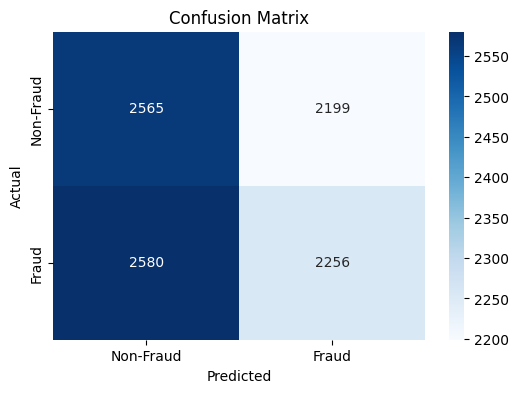


Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.50      0.54      0.52      4764
       Fraud       0.51      0.47      0.49      4836

    accuracy                           0.50      9600
   macro avg       0.50      0.50      0.50      9600
weighted avg       0.50      0.50      0.50      9600



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the evaluation metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Non-Fraud', 'Fraud']))


**Gradient Boosting Model Evaluation**

Model Performance Metrics:
Accuracy: 0.50
Precision: 0.51
Recall: 0.45
F1-Score: 0.48


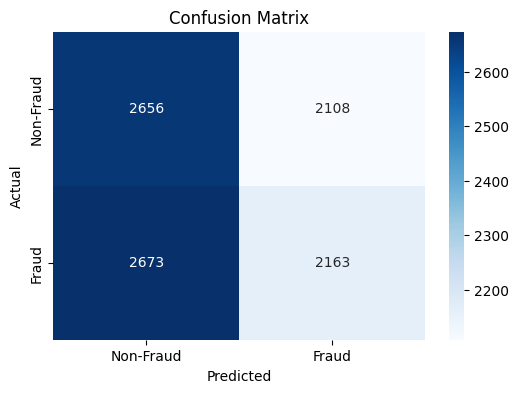


Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.50      0.56      0.53      4764
       Fraud       0.51      0.45      0.48      4836

    accuracy                           0.50      9600
   macro avg       0.50      0.50      0.50      9600
weighted avg       0.50      0.50      0.50      9600



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_pred = gb_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the evaluation metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Non-Fraud', 'Fraud']))


### **Step 4: Testing Interface**

In [29]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00


In [31]:
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

# Example: Define your trained model (replace `rf_model` with your actual model)
# Assuming you have a trained Random Forest model saved in rf_model
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier()  # Replace this with your actual trained model

# If scaling is required, initialize the scaler (comment out if not using scaling)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)  # Replace X_train with your actual training data

# Fraud detection prediction function
def predict_fraud(time, amount, feature1, feature2, feature3, feature4, feature5, feature6, feature7):
    """
    Predict fraud based on transaction details.
    Args:
        time, amount, feature1-7: Transaction details entered by the user.
    """
    # Prepare the input data
    input_data = pd.DataFrame({
        "Time": [time],
        "Amount": [amount],
        "Feature1": [feature1],
        "Feature2": [feature2],
        "Feature3": [feature3],
        "Feature4": [feature4],
        "Feature5": [feature5],
        "Feature6": [feature6],
        "Feature7": [feature7]
    })

    # If scaling is applied, uncomment the following line
    # input_data = scaler.transform(input_data)

    # Make a prediction
    prediction = rf_model.predict(input_data)  # Replace rf_model with your trained model
    result = "Fraudulent" if prediction[0] == 1 else "Non-Fraudulent"

    # Display the result
    print(f"\nPrediction: The transaction is {result}.")

# Create interactive widgets
time_widget = widgets.FloatText(description="Time:")
amount_widget = widgets.FloatText(description="Amount:")
feature1_widget = widgets.FloatText(description="Feature1:")
feature2_widget = widgets.FloatText(description="Feature2:")
feature3_widget = widgets.FloatText(description="Feature3:")
feature4_widget = widgets.FloatText(description="Feature4:")
feature5_widget = widgets.FloatText(description="Feature5:")
feature6_widget = widgets.FloatText(description="Feature6:")
feature7_widget = widgets.FloatText(description="Feature7:")
button = widgets.Button(description="Predict")

# Function to execute when the button is clicked
def on_button_click(b):
    predict_fraud(
        time_widget.value,
        amount_widget.value,
        feature1_widget.value,
        feature2_widget.value,
        feature3_widget.value,
        feature4_widget.value,
        feature5_widget.value,
        feature6_widget.value,
        feature7_widget.value,
    )

# Attach the button click event
button.on_click(on_button_click)

# Display the widgets
display(
    time_widget, amount_widget, feature1_widget, feature2_widget, feature3_widget,
    feature4_widget, feature5_widget, feature6_widget, feature7_widget, button
)


FloatText(value=0.0, description='Time:')

FloatText(value=0.0, description='Amount:')

FloatText(value=0.0, description='Feature1:')

FloatText(value=0.0, description='Feature2:')

FloatText(value=0.0, description='Feature3:')

FloatText(value=0.0, description='Feature4:')

FloatText(value=0.0, description='Feature5:')

FloatText(value=0.0, description='Feature6:')

FloatText(value=0.0, description='Feature7:')

Button(description='Predict', style=ButtonStyle())


Prediction: The transaction is Fraudulent.
